## Recurrent Neural Network

### Recurrent Neural Network (RNN)
#### This works on sequential data...traditional sequential data such as stock price, weather temperature...other sequential data is like text data such as twitter data.  Conversational General Purpose Transformer.  Transformers also use long and short term memory network. 

#### Text also has to have sequence in order to have meaning even though there are variations.  
#### 
#### LSTMs(Long and Short Term Memory) for memory operations within RNN
#### Perform gated operations in LSTMs using GRUs
#### Improve the performance of LSTMs using the attention mechanism

#### What is Sequential Data?
#### When the data points are dependent on other data points within a dataset.  Such as Time Series Data.

#### I need to remember what was my obervations in the past.
#### Normally Vanila model does not remember the past observations.  Input is passed and the network goes through epochs and then provide the output. You pass the next record, it will update the output.  It does not remember the previous values. 
#### To address this problem, we have recurrent neural network.  What it does that it takes the state, each cell also pass the previous observation or cell state to itself.  Then it is combines with the input data and provide the output.  
#### Input at t is combined with cell state of RNN at t-1 and then gives the output at t. 

#####
### Applications of RNN
#### 1. Speech Recognition (Speech to Text)
#### 2. Image Captioning (Create a model that is capable of understanding the elements in an image, one input image but multiple prediction)
#### 3. Sentiment Analysis (Many to one: you receive many words and then give output as sad, happy, or okay)
#### 4. Machine Translation (Many to Many: Reads a sentence in English and then outputs a sentence in French)
####
#### http://karpathy.github.io/2015/05/21/rnn-effectiveness/
#### Google Article: Attention Is All You Need
#### www.paperswithcode.com
#### https://colah.github.io/posts/2015-08-Understanding-LSTMs/
####
#### Planogram (CNN)

### Deep RNNs 
####
#### LSTM Cell
#### 1. Input at t (First input)
#### 2. Short-Term State: H at t-1 (Second Input)
#### 3. Long-Term State: C at t-1 (Third Input)
#### Now to implement memory, they created the gates
#### 1. Forget Gate (Dense & Sigmoid): Do I need to remember the history or wipe the history to start afresh again
#### 2. Simple RNN Cell (Dense & Tanh): 
#### 3. Input Gate (Dense & Sigmoid): Is the input relevant to be added to the long term state/history or not
#### 4. Output Gate (Dense & Sigmoid): 
#### 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

%matplotlib inline

In [5]:
np.random.seed(12345)

In [6]:
data = pd.read_csv('GOOG3.csv', parse_dates=True)

In [7]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-27,82.683998,82.750000,81.287498,81.716499,81.716499,37232000
1,2020-08-28,81.674500,82.358498,81.537498,82.220497,82.220497,29980000
2,2020-08-31,82.394501,82.398247,81.515503,81.709000,81.709000,36468000
3,2020-09-01,81.831497,83.286499,81.611000,83.035500,83.035500,36506000
4,2020-09-02,83.688751,86.658997,83.316498,86.414001,86.414001,50224000


In [8]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
499,2022-08-22,116.099998,116.500000,114.669998,115.070000,115.070000,19316000
500,2022-08-23,114.320000,115.930000,114.300003,114.769997,114.769997,14390700
501,2022-08-24,114.449997,115.717003,113.779999,114.699997,114.699997,16051200
502,2022-08-25,115.150002,117.779999,115.050003,117.699997,117.699997,14874700
503,2022-08-26,115.809998,116.449997,111.250000,111.300003,111.300003,31590470


In [12]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,504.000000,504.000000,504.000000,504.000000,504.000000,5.040000e+02
mean,117.559919,118.875003,116.289804,117.576705,117.576705,2.837242e+07
std,22.022068,22.059867,21.827001,21.948028,21.948028,1.131132e+07
min,70.551498,72.185448,70.327499,70.760498,70.760498,6.936000e+06
25%,103.357872,104.452974,102.116564,103.112875,103.112875,2.071800e+07
50%,118.453999,119.931000,117.117699,118.825001,118.825001,2.617800e+07
75%,137.111145,138.404129,135.722248,137.012374,137.012374,3.322150e+07
max,151.863495,152.100006,149.887497,150.709000,150.709000,8.975000e+07


In [15]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [16]:
data.shape

(504, 7)

In [17]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [18]:
data['Date']=pd.to_datetime(data['Date'], format="%Y-%m-%d")

In [19]:
df_close = data[['Date', 'Adj Close']]

In [20]:
df_close.columns = ['Date', 'y']

In [21]:
df_close.head()

,Date,y
0,2020-08-27,81.716499
1,2020-08-28,82.220497
2,2020-08-31,81.709000
3,2020-09-01,83.035500
4,2020-09-02,86.414001


In [22]:
df_close.sort_values(by='Date', inplace=True)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
df_close.head(10)

,Date,y
0,2020-08-27,81.716499
1,2020-08-28,82.220497
2,2020-08-31,81.709000
3,2020-09-01,83.035500
4,2020-09-02,86.414001
5,2020-09-03,82.092003
6,2020-09-04,79.552002
7,2020-09-08,76.619499
8,2020-09-09,77.848000
9,2020-09-10,76.600998


In [25]:
df_close.tail(10)

,Date,y
494,2022-08-15,122.879997
495,2022-08-16,122.510002
496,2022-08-17,120.320000
497,2022-08-18,120.860001
498,2022-08-19,118.120003
499,2022-08-22,115.070000
500,2022-08-23,114.769997
501,2022-08-24,114.699997
502,2022-08-25,117.699997
503,2022-08-26,111.300003


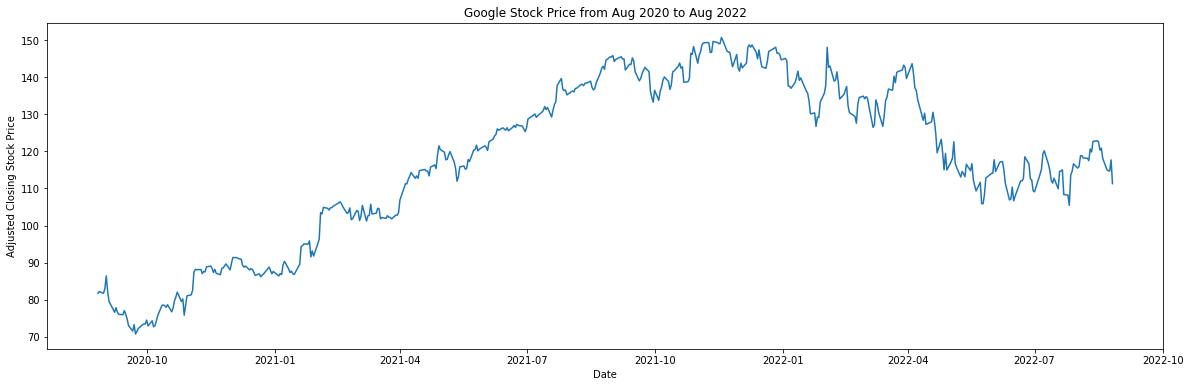

In [27]:
plt.figure(figsize = (20,6))
sns.lineplot(data=df_close, x='Date', y='y')
plt.title('Google Stock Price from Aug 2020 to Aug 2022')
plt.ylabel('Adjusted Closing Stock Price')
plt.show()

In [28]:
# Now we have to create a sliding window.  Say my data set is 1,2,3,4,5,6,7,8,9,10
# 1,2,3,4 -> 5
# 2,3,4,5 -> 6
# 3,4,5,6 -> 7

In [29]:
window_size = 45
for i in range(window_size):
    df_close['y' + str(i+1)] = df_close['y'].shift(i+1)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
df_close.iloc[0:5, :]

,Date,y,y1,y2,y3,y4,y5,y6,y7,y8,...,y36,y37,y38,y39,y40,y41,y42,y43,y44,y45
0,2020-08-27,81.716499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-28,82.220497,81.716499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-08-31,81.709000,82.220497,81.716499,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-09-01,83.035500,81.709000,82.220497,81.716499,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-09-02,86.414001,83.035500,81.709000,82.220497,81.716499,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df_close.iloc[44:50, :]

,Date,y,y1,y2,y3,y4,y5,y6,y7,y8,...,y36,y37,y38,y39,y40,y41,y42,y43,y44,y45
44,2020-10-29,78.362000,75.831001,80.212997,79.522499,82.050003,80.766502,79.665497,77.796501,76.730499,...,77.848000,76.619499,79.552002,82.092003,86.414001,83.035500,81.709000,82.220497,81.716499,NaN
45,2020-10-30,81.050499,78.362000,75.831001,80.212997,79.522499,82.050003,80.766502,79.665497,77.796501,...,76.600998,77.848000,76.619499,79.552002,82.092003,86.414001,83.035500,81.709000,82.220497,81.716499
46,2020-11-02,81.301498,81.050499,78.362000,75.831001,80.212997,79.522499,82.050003,80.766502,79.665497,...,76.036003,76.600998,77.848000,76.619499,79.552002,82.092003,86.414001,83.035500,81.709000,82.220497
47,2020-11-03,82.510498,81.301498,81.050499,78.362000,75.831001,80.212997,79.522499,82.050003,80.766502,...,75.963997,76.036003,76.600998,77.848000,76.619499,79.552002,82.092003,86.414001,83.035500,81.709000
48,2020-11-04,87.456497,82.510498,81.301498,81.050499,78.362000,75.831001,80.212997,79.522499,82.050003,...,77.071999,75.963997,76.036003,76.600998,77.848000,76.619499,79.552002,82.092003,86.414001,83.035500
49,2020-11-05,88.168503,87.456497,82.510498,81.301498,81.050499,78.362000,75.831001,80.212997,79.522499,...,76.044998,77.071999,75.963997,76.036003,76.600998,77.848000,76.619499,79.552002,82.092003,86.414001


In [40]:
# Dropping the rows (axis = 0) where NaN is present. 
df_close.dropna(axis=0, inplace=True)

In [41]:
df_close.head()

,Date,y,y1,y2,y3,y4,y5,y6,y7,y8,...,y36,y37,y38,y39,y40,y41,y42,y43,y44,y45
45,2020-10-30,81.050499,78.362000,75.831001,80.212997,79.522499,82.050003,80.766502,79.665497,77.796501,...,76.600998,77.848000,76.619499,79.552002,82.092003,86.414001,83.035500,81.709000,82.220497,81.716499
46,2020-11-02,81.301498,81.050499,78.362000,75.831001,80.212997,79.522499,82.050003,80.766502,79.665497,...,76.036003,76.600998,77.848000,76.619499,79.552002,82.092003,86.414001,83.035500,81.709000,82.220497
47,2020-11-03,82.510498,81.301498,81.050499,78.362000,75.831001,80.212997,79.522499,82.050003,80.766502,...,75.963997,76.036003,76.600998,77.848000,76.619499,79.552002,82.092003,86.414001,83.035500,81.709000
48,2020-11-04,87.456497,82.510498,81.301498,81.050499,78.362000,75.831001,80.212997,79.522499,82.050003,...,77.071999,75.963997,76.036003,76.600998,77.848000,76.619499,79.552002,82.092003,86.414001,83.035500
49,2020-11-05,88.168503,87.456497,82.510498,81.301498,81.050499,78.362000,75.831001,80.212997,79.522499,...,76.044998,77.071999,75.963997,76.036003,76.600998,77.848000,76.619499,79.552002,82.092003,86.414001


In [42]:
df_close.shape

(459, 47)

In [43]:
df_train = df_close[df_close['Date'] <= pd.to_datetime('2022-08-14')]
df_test = df_close[df_close['Date'] > pd.to_datetime('2022-08-14')]

In [44]:
print(f" Training shape {df_train.shape}, Testing shape {df_test.shape}")

 Training shape (449, 47), Testing shape (10, 47)


In [45]:
df_train.tail()

,Date,y,y1,y2,y3,y4,y5,y6,y7,y8,...,y36,y37,y38,y39,y40,y41,y42,y43,y44,y45
489,2022-08-08,118.139999,118.220001,118.870003,118.779999,115.900002,115.480003,116.639999,114.589996,113.599998,...,110.390503,107.194000,106.876503,111.427498,114.917999,117.237999,117.229500,117.010498,114.564003,117.746002
490,2022-08-09,117.500000,118.139999,118.220001,118.870003,118.779999,115.900002,115.480003,116.639999,114.589996,...,106.636002,110.390503,107.194000,106.876503,111.427498,114.917999,117.237999,117.229500,117.010498,114.564003
491,2022-08-10,120.650002,117.500000,118.139999,118.220001,118.870003,118.779999,115.900002,115.480003,116.639999,...,107.865501,106.636002,110.390503,107.194000,106.876503,111.427498,114.917999,117.237999,117.229500,117.010498
492,2022-08-11,119.820000,120.650002,117.500000,118.139999,118.220001,118.870003,118.779999,115.900002,115.480003,...,112.014999,107.865501,106.636002,110.390503,107.194000,106.876503,111.427498,114.917999,117.237999,117.229500
493,2022-08-12,122.650002,119.820000,120.650002,117.500000,118.139999,118.220001,118.870003,118.779999,115.900002,...,112.033997,112.014999,107.865501,106.636002,110.390503,107.194000,106.876503,111.427498,114.917999,117.237999


In [47]:
df_test.head()

,Date,y,y1,y2,y3,y4,y5,y6,y7,y8,...,y36,y37,y38,y39,y40,y41,y42,y43,y44,y45
494,2022-08-15,122.879997,122.650002,119.820000,120.650002,117.500000,118.139999,118.220001,118.870003,118.779999,...,112.684502,112.033997,112.014999,107.865501,106.636002,110.390503,107.194000,106.876503,111.427498,114.917999
495,2022-08-16,122.510002,122.879997,122.650002,119.820000,120.650002,117.500000,118.139999,118.220001,118.870003,...,118.538002,112.684502,112.033997,112.014999,107.865501,106.636002,110.390503,107.194000,106.876503,111.427498
496,2022-08-17,120.320000,122.510002,122.879997,122.650002,119.820000,120.650002,117.500000,118.139999,118.220001,...,116.622498,118.538002,112.684502,112.033997,112.014999,107.865501,106.636002,110.390503,107.194000,106.876503
497,2022-08-18,120.860001,120.320000,122.510002,122.879997,122.650002,119.820000,120.650002,117.500000,118.139999,...,112.571503,116.622498,118.538002,112.684502,112.033997,112.014999,107.865501,106.636002,110.390503,107.194000
498,2022-08-19,118.120003,120.860001,120.320000,122.510002,122.879997,122.650002,119.820000,120.650002,117.500000,...,112.256500,112.571503,116.622498,118.538002,112.684502,112.033997,112.014999,107.865501,106.636002,110.390503


In [48]:
# The tail adn head shows that data is in sequence. 

In [49]:
X_train = df_train.drop(['Date', 'y'], axis = 1)
y_train = df_train['y']

X_test = df_test.drop(['Date', 'y'], axis = 1)
y_test = df_test['y']

In [50]:
print(f"X Train Shape {X_train.shape} and X Test Shape {X_test.shape}")

X Train Shape (449, 45) and X Test Shape (10, 45)


In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [53]:
tf.random.set_seed(12345)

In [54]:
X_train.shape

(449, 45)

In [55]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [56]:
print(X_train.shape)
print(X_test.shape)

(449, 45, 1)
(10, 45, 1)


In [70]:
model=Sequential()

In [71]:
model.add(LSTM(128,
               activation = 'relu',
               return_sequences = True,
               input_shape=(None, 1)
              )
         )

In [72]:
model.add(LSTM(128, activation='relu'))

In [73]:
model.add(Dense(units=1, 
                activation = 'linear')
         )

In [74]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, None, 128)         66560     
                                                                 
 lstm_4 (LSTM)               (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
_________________________________________________________________


In [75]:
model.compile(optimizer='adam', 
              loss='huber', 
              metrics='mse')

In [76]:
# Mean Absolute Percentage Error, MAPE = Avg(Abs(Actual - Predicted)/Actual)
# 1 - MAPE = Accuracy
cp=tf.keras.callbacks.ModelCheckpoint('GoogModel.h5', 
                                      monitor='val_mse',
                                      save_weights=True,
                                      save_best_only=True,
                                      verbose=1)

In [77]:
model.fit(X_train,
          y_train,
          validation_data = (X_test, y_test),
          epochs = 200, 
          callbacks = [cp])

Epoch 1/200
15/15 [==============================] - ETA: 0s - loss: 120.3571 - mse: 15141.2754
Epoch 1: val_mse improved from inf to 13765.22363, saving model to GoogModel.h5
15/15 [==============================] - 5s 186ms/step - loss: 120.3571 - mse: 15141.2754 - val_loss: 116.7690 - val_mse: 13765.2236
Epoch 2/200
15/15 [==============================] - ETA: 0s - loss: 143.7116 - mse: 74333.8672
Epoch 2: val_mse did not improve from 13765.22363
15/15 [==============================] - 2s 146ms/step - loss: 143.7116 - mse: 74333.8672 - val_loss: 116.9862 - val_mse: 13816.1797
Epoch 3/200
15/15 [==============================] - ETA: 0s - loss: 120.3115 - mse: 14954.8145
Epoch 3: val_mse did not improve from 13765.22363
15/15 [==============================] - 2s 146ms/step - loss: 120.3115 - mse: 14954.8145 - val_loss: 117.0922 - val_mse: 13841.0781
Epoch 4/200
15/15 [==============================] - ETA: 0s - loss: 120.5247 - mse: 15009.5947
Epoch 4: val_mse did not improve from

In [78]:
new_model=tf.keras.models.load_model('GoogModel.h5')

In [ ]:
# Mean Absolute Percentage Error, MAPE = Avg(Abs(Actual - Predicted)/Actual)
# 1 - MAPE = Accuracy
# So if actual and predicted values are same then MAPE is 0, therefore, accuracy is 100%. 
# If predicted value is different than actual then MAPE is non-zero, therefore accuracy will be less than 100%. 

In [80]:
y_tr_pred = new_model.predict(X_train)

In [81]:
y_ts_pred = new_model.predict(X_test)

In [82]:
from sklearn.metrics import mean_absolute_percentage_error

In [83]:
print(f"Training set accuracy : {np.round(100 - mean_absolute_percentage_error(y_true = y_train, y_pred = y_tr_pred)*100,2)}%")

Training set accuracy : 98.15%


In [90]:
print(f"Test set accuracy : {np.round(100 - mean_absolute_percentage_error(y_true = y_test, y_pred = y_ts_pred)*100,2)}%")

Test set accuracy : 98.33%


In [91]:
df1 = df_train[['Date', 'y']]
df1['Pred'] = y_tr_pred

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


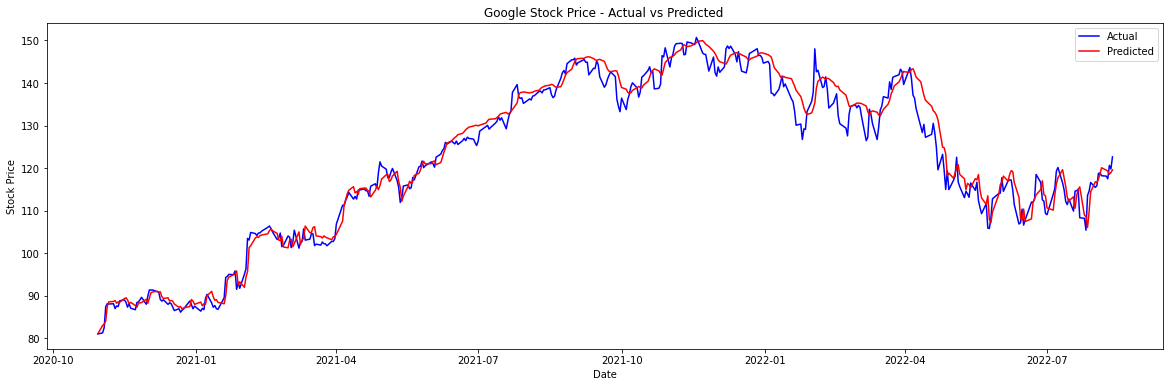

In [92]:
plt.figure(figsize = (20,6))
plt.plot(df1['Date'], df1['y'],color='blue', label='Actual')
plt.plot(df1['Date'], df1['Pred'],color='red', label='Predicted')
plt.title("Google Stock Price - Actual vs Predicted " )
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [95]:
df1.head()

,Date,y,Pred
45,2020-10-30,81.050499,81.133484
46,2020-11-02,81.301498,83.053535
47,2020-11-03,82.510498,83.353577
48,2020-11-04,87.456497,84.130966
49,2020-11-05,88.168503,87.580978


In [96]:
new_test_df = df_test[['Date','y']].copy()
new_test_df['yhat'] = y_ts_pred

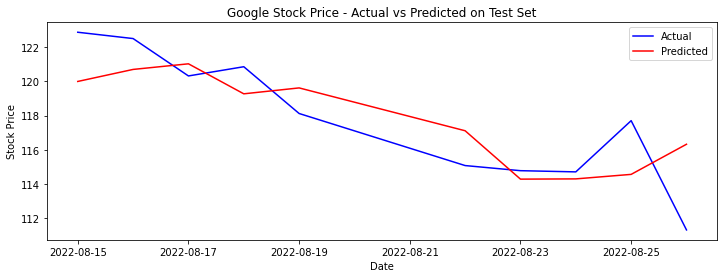

In [97]:
plt.figure(figsize = (12,4))
plt.plot(new_test_df['Date'], new_test_df['y'],color='blue', label='Actual')
plt.plot(new_test_df['Date'], new_test_df['yhat'],color='red', label='Predicted')
plt.title("Google Stock Price - Actual vs Predicted on Test Set" )
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

####
## Gated Recurrent Units GRU
#### Update Gate: Determines how much of the past information need to be passed
#### Reset Gate: How much of the past information need to be reset
#### Current Memory: 
#### Current State: 

## Peephole LSTM
#### A peephole LSTM allows peeping into the memory
